In [246]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [247]:
# df_listing= pd.read_csv('/Users/cheryl/Desktop/CS6220/project/Urban-Analytics-Crime-Community-Service-and-Airbnb-Pricing-in-Seattle/data/listings.csv')
df_listing= pd.read_csv('./data/listings.csv')

In [248]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6882 non-null   int64  
 1   name                            6882 non-null   object 
 2   host_id                         6882 non-null   int64  
 3   host_name                       6882 non-null   object 
 4   neighbourhood_group             6882 non-null   object 
 5   neighbourhood                   6882 non-null   object 
 6   latitude                        6882 non-null   float64
 7   longitude                       6882 non-null   float64
 8   room_type                       6882 non-null   object 
 9   price                           6504 non-null   float64
 10  minimum_nights                  6882 non-null   int64  
 11  number_of_reviews               6882 non-null   int64  
 12  last_review                     58

In [249]:
# drop useless column
columns_to_drop = ['host_id', 'host_name', 'neighbourhood_group', 'minimum_nights',
                   'number_of_reviews', 'last_review', 'reviews_per_month',
                   'calculated_host_listings_count', 'number_of_reviews_ltm', 'license']

df_listing.drop(columns=columns_to_drop, axis=1, inplace=True)


In [250]:
# Keep the necessary columns
df_listing_filtered = df_listing
# Counting the NaN values in each column
na_counts = df_listing_filtered.isna().sum()

In [251]:
na_counts

id                    0
name                  0
neighbourhood         0
latitude              0
longitude             0
room_type             0
price               378
availability_365      0
dtype: int64

In [252]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_listing['price'] = imputer.fit_transform(df_listing[['price']])

# Handling duplicate
df_listing.drop_duplicates(inplace=True)

# Feature standardization or normalization
scaler = StandardScaler()
df_listing[['latitude', 'longitude', 'availability_365']] = scaler.fit_transform(df_listing[['latitude', 'longitude', 'availability_365']])

In [253]:
df_listing.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,availability_365
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,Wallingford,0.565246,-0.062390,Entire home/apt,99.00000,0.016391
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,Georgetown,-1.548414,0.447394,Private room,67.00000,1.374321
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,Fairmount Park,-1.451519,-1.579091,Entire home/apt,184.00000,1.185518
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Fairmount Park,-1.424761,-1.562219,Entire home/apt,155.00000,-0.499187
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,Wallingford,0.598491,-0.054256,Entire home/apt,174.15821,-1.268922


Neighborhood & Price

In [254]:
# Count the number of neighborhood
df_listing['neighbourhood'].nunique()

89

In [255]:
df_listing['neighbourhood'].unique()

array(['Wallingford', 'Georgetown', 'Fairmount Park', 'Whittier Heights',
       'Sunset Hill', 'Eastlake', 'Fremont', 'Green Lake', 'Portage Bay',
       'Phinney Ridge', 'Crown Hill', 'Columbia City', 'Lawton Park',
       'North Queen Anne', 'West Queen Anne', 'First Hill', 'Broadway',
       'Stevens', 'North Admiral', 'International District',
       'North Beacon Hill', 'West Woodland', 'Greenwood', 'Cedar Park',
       'Mount Baker', 'Mann', 'Ravenna', 'Belltown',
       'University District', 'Harrison/Denny-Blaine', 'South Delridge',
       'Atlantic', 'Broadview', 'Maple Leaf', 'East Queen Anne',
       'Pioneer Square', 'Highland Park', 'Laurelhurst', 'Haller Lake',
       'Madison Park', 'Fauntleroy', 'Madrona', 'Loyal Heights',
       'Gatewood', 'Leschi', 'Westlake', 'Adams',
       'North Beach/Blue Ridge', 'North Delridge', 'Bryant',
       'Seward Park', 'View Ridge', 'Central Business District',
       'Pike-Market', 'High Point', 'Yesler Terrace', 'Alki',
       'Bit

In [256]:
# Perform one-hot encoding in 'neighborhood' column
df_listing_encoded = pd.get_dummies(df_listing, columns=['neighbourhood'], drop_first=True)
df_listing_encoded

,id,name,latitude,longitude,room_type,price,availability_365,neighbourhood_Alki,neighbourhood_Arbor Heights,neighbourhood_Atlantic,...,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,0.565246,-0.062390,Entire home/apt,99.00000,0.016391,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,-1.548414,0.447394,Private room,67.00000,1.374321,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,-1.451519,-1.579091,Entire home/apt,184.00000,1.185518,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,-1.424761,-1.562219,Entire home/apt,155.00000,-0.499187,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,0.598491,-0.054256,Entire home/apt,174.15821,-1.268922,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,1049006190643672700,Home in Seattle · ★New · 3 bedrooms · 8 beds ·...,1.828151,0.363008,Entire home/apt,148.00000,0.590062,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6878,1049036878221888515,Home in Seattle · ★New · 2 bedrooms · 3 beds ·...,1.835003,0.368739,Entire home/apt,115.00000,0.626370,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6879,1049307510249446208,Home in Seattle · ★New · 1 bedroom · 1 bath,0.914313,0.460350,Private room,42.00000,0.655417,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6880,1049592710345029420,Rental unit in Seattle · ★New · 1 bedroom · 1 ...,0.760493,0.840730,Entire home/apt,64.00000,1.381582,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [257]:
# Selecting input features and target variable
X = df_listing_encoded.drop(columns=['id', 'name', 'latitude', 'longitude','room_type', 'price','availability_365']) 
y = df_listing_encoded['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [259]:
# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on testing data
rf_predictions = rf_model.predict(X_test)


# Evaluate the model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_msle = mean_squared_log_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100

print("Random Forest Evaluation Metrics:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("MSLE:", rf_msle)
print("R2 Score:", rf_r2)
print("MAPE:", rf_mape)

Random Forest Evaluation Metrics:
RMSE: 314.2230840641484
MAE: 93.6376243166111
MSLE: 0.4073095313173134
R2 Score: -0.0019435647832282132
MAPE: 65.66616718886948


* some visualizaiton results

In [260]:
def analyze_plot(model, X, y, X_train, X_test, y_train, y_test):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    predicted_all = model.predict(X)
    ax[0].scatter(y, predicted_all, c='#2B94E9', alpha=0.4)
    ax[0].set_xlabel('Actual Values')
    ax[0].set_ylabel('Predicted Values')
    ax[0].set_title('Predicted vs. Actual values')
    ax[0].plot((predicted_all.min(), predicted_all.max()), (predicted_all.min(), predicted_all.max()), ls='--',c='red')

    
    ax[1].scatter(model.predict(X_train), model.predict(X_train) - y_train, c='#2B94E9', alpha=0.4, label='Train Set')
    ax[1].scatter(model.predict(X_test), model.predict(X_test) - y_test, c='#94BA65', label='Test Set')
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Residuals')
    ax[1].axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
    ax[1].set_title('Residual Plot')
    ax[1].grid(True)
    ax[1].legend()

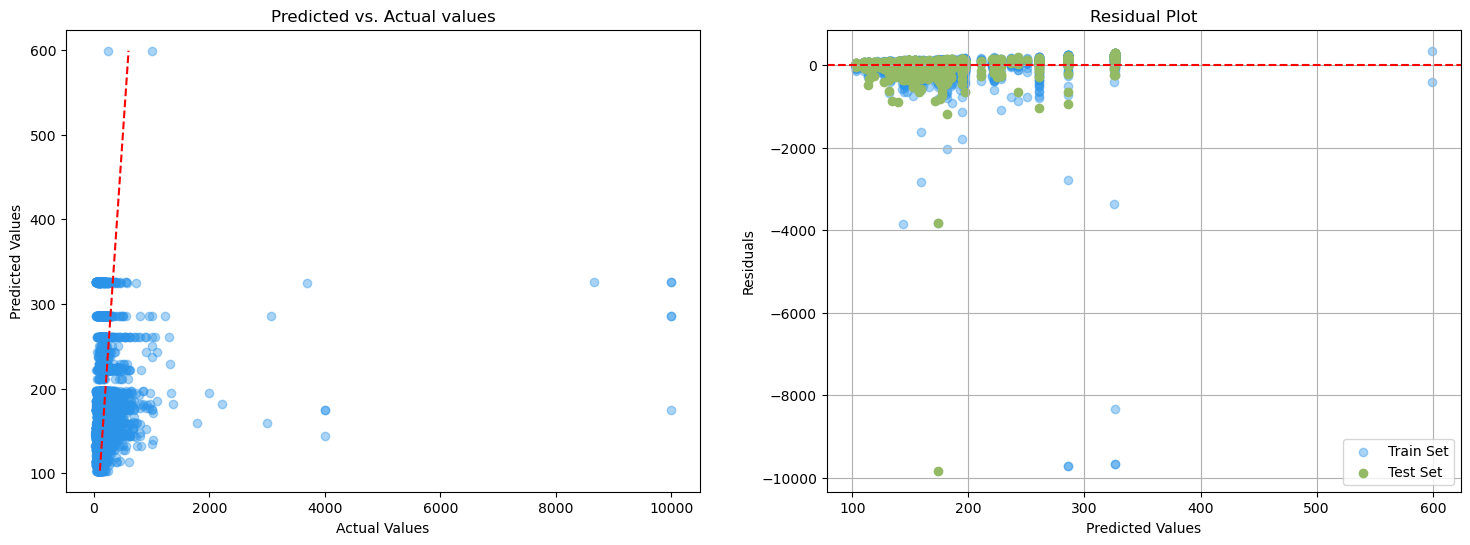

In [261]:
analyze_plot(rf_model, X, y, X_train, X_test, y_train, y_test)

We would like to see how the other features such as room type and review rating affect the price.

In [262]:
# Count the number of 'room_type'
df_listing['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [263]:
# Convert 'room_type' categories into numerical values
df_listing['room_type_numeric'] = df_listing['room_type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2})

In [264]:
# Extracting the rating from the 'name' column and creating a new column 'rating'
df_listing['review rating'] = df_listing['name'].str.extract(r'★\s*(\d+\.\d+)', expand=False).astype(float)
df_listing.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,availability_365,room_type_numeric,review rating
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,Wallingford,0.565246,-0.062390,Entire home/apt,99.00000,0.016391,0,4.60
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,Georgetown,-1.548414,0.447394,Private room,67.00000,1.374321,1,4.72
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,Fairmount Park,-1.451519,-1.579091,Entire home/apt,184.00000,1.185518,0,4.97
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Fairmount Park,-1.424761,-1.562219,Entire home/apt,155.00000,-0.499187,0,4.99
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,Wallingford,0.598491,-0.054256,Entire home/apt,174.15821,-1.268922,0,4.56


In [265]:
# Counting the NaN values in each column
na_counts = df_listing_filtered.isna().sum()
na_counts

id                      0
name                    0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
availability_365        0
room_type_numeric       0
review rating        1682
dtype: int64

In [266]:
# NaN rating houses are new listing, fill with O
df_listing['review rating'].fillna(0, inplace=True)
df_listing

,id,name,neighbourhood,latitude,longitude,room_type,price,availability_365,room_type_numeric,review rating
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,Wallingford,0.565246,-0.062390,Entire home/apt,99.00000,0.016391,0,4.60
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,Georgetown,-1.548414,0.447394,Private room,67.00000,1.374321,1,4.72
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,Fairmount Park,-1.451519,-1.579091,Entire home/apt,184.00000,1.185518,0,4.97
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Fairmount Park,-1.424761,-1.562219,Entire home/apt,155.00000,-0.499187,0,4.99
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,Wallingford,0.598491,-0.054256,Entire home/apt,174.15821,-1.268922,0,4.56
...,...,...,...,...,...,...,...,...,...,...
6877,1049006190643672700,Home in Seattle · ★New · 3 bedrooms · 8 beds ·...,Pinehurst,1.828151,0.363008,Entire home/apt,148.00000,0.590062,0,0.00
6878,1049036878221888515,Home in Seattle · ★New · 2 bedrooms · 3 beds ·...,Pinehurst,1.835003,0.368739,Entire home/apt,115.00000,0.626370,0,0.00
6879,1049307510249446208,Home in Seattle · ★New · 1 bedroom · 1 bath,University District,0.914313,0.460350,Private room,42.00000,0.655417,1,0.00
6880,1049592710345029420,Rental unit in Seattle · ★New · 1 bedroom · 1 ...,University District,0.760493,0.840730,Entire home/apt,64.00000,1.381582,0,0.00


In [267]:
# Create a SLU subset to see this area
df_slu = df_listing[df_listing['neighbourhood'] == 'South Lake Union']
df_slu.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,availability_365,room_type_numeric,review rating
1201,20696304,Loft in Seattle · ★4.97 · 1 bedroom · 2 beds ·...,South Lake Union,-0.098225,-0.140425,Entire home/apt,153.0,-1.268922,0,4.97
1235,21175123,Townhouse in Seattle · ★4.94 · 2 bedrooms · 2 ...,South Lake Union,0.192259,0.170508,Entire home/apt,319.0,-0.259552,0,4.94
1380,23486764,Loft in Seattle · 4 bedrooms · 1 bed · 4.5 baths,South Lake Union,-0.151335,-0.034370,Private room,450.0,-1.268922,1,0.00
2032,36770186,Condo in Seattle · ★4.90 · 1 bedroom · 2 beds ...,South Lake Union,-0.160457,-0.350425,Entire home/apt,132.0,-0.303122,0,4.90
2088,38213184,Serviced apartment in Seattle · 1 bedroom · 1 ...,South Lake Union,-0.151132,-0.069621,Entire home/apt,122.0,-1.268922,0,0.00


Liner Regeression model

In [268]:
# Select one feature and target variable
X = df_slu[['review rating']]
y = df_slu['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
#  Initialize and fit the Linear Regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [270]:
# Predict on testing data
predictions = model.predict(X_test)

In [271]:
# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
RMSE: 62.76787139623352
MAE: 49.498264102080014
R-squared: -0.5116304939005845


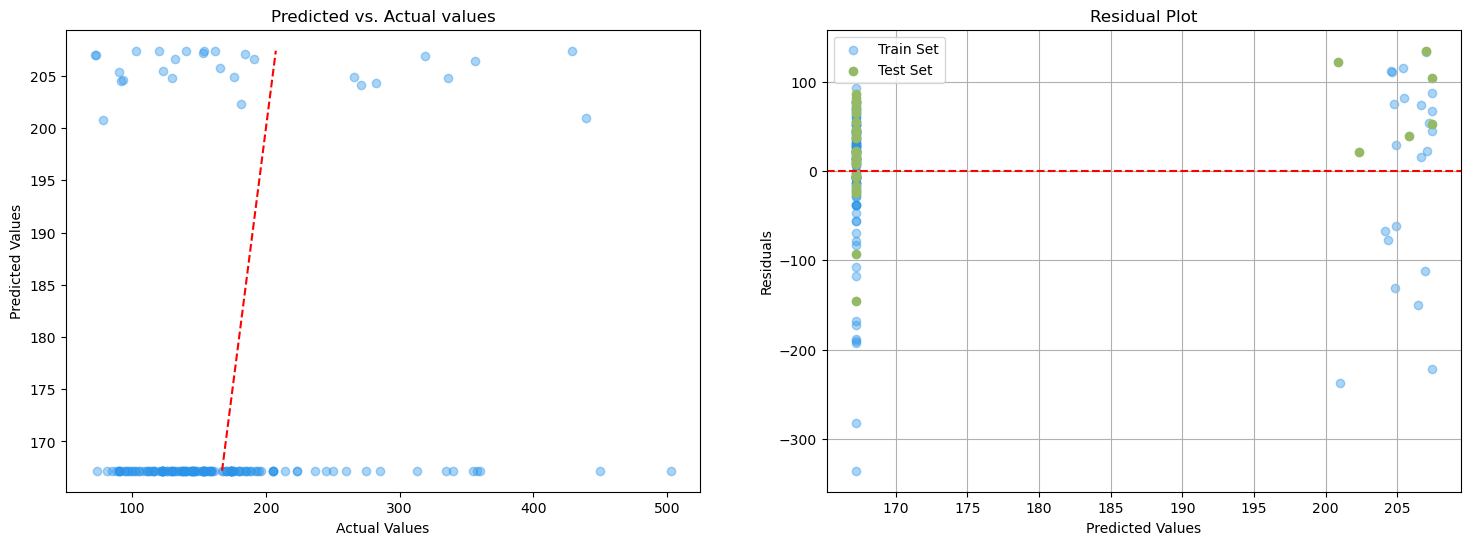

In [272]:
analyze_plot(model, X, y, X_train, X_test, y_train, y_test)

In [273]:
# Select two features and target variable
X = df_slu[['room_type_numeric', 'review rating']]
y = df_slu['price']

In [274]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
#  Initialize and fit the Linear Regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on testing data
lr_predictions = model.predict(X_test)

In [276]:
# Evaluate the model
rmse = mean_squared_error(y_test, lr_predictions, squared=False)
mae = mean_absolute_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
RMSE: 62.63796879039962
MAE: 49.480424183856094
R-squared: -0.5053801132391229


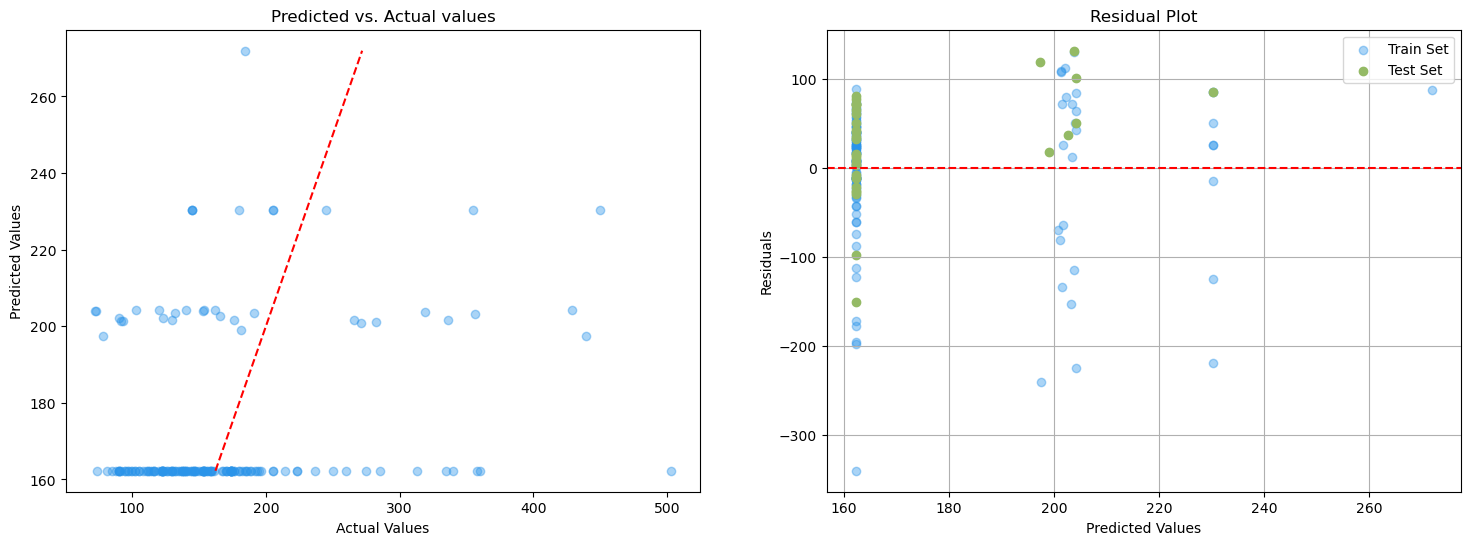

In [277]:
analyze_plot(model, X, y, X_train, X_test, y_train, y_test)

Random Forest Model

In [278]:
# Select one feature and target variable
X = df_slu[['room_type_numeric']]
y = df_slu['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
# Select features and target variable
X = df_slu[['room_type_numeric']]
y = df_slu['price']

In [280]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [281]:
# Predict on testing data
rf_predictions = rf_model.predict(X_test)

In [282]:
# Evaluate the model
rmse = mean_squared_error(y_test, rf_predictions, squared=False)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
RMSE: 58.410945294211466
MAE: 46.15241294584039
R-squared: -0.3090592739500402


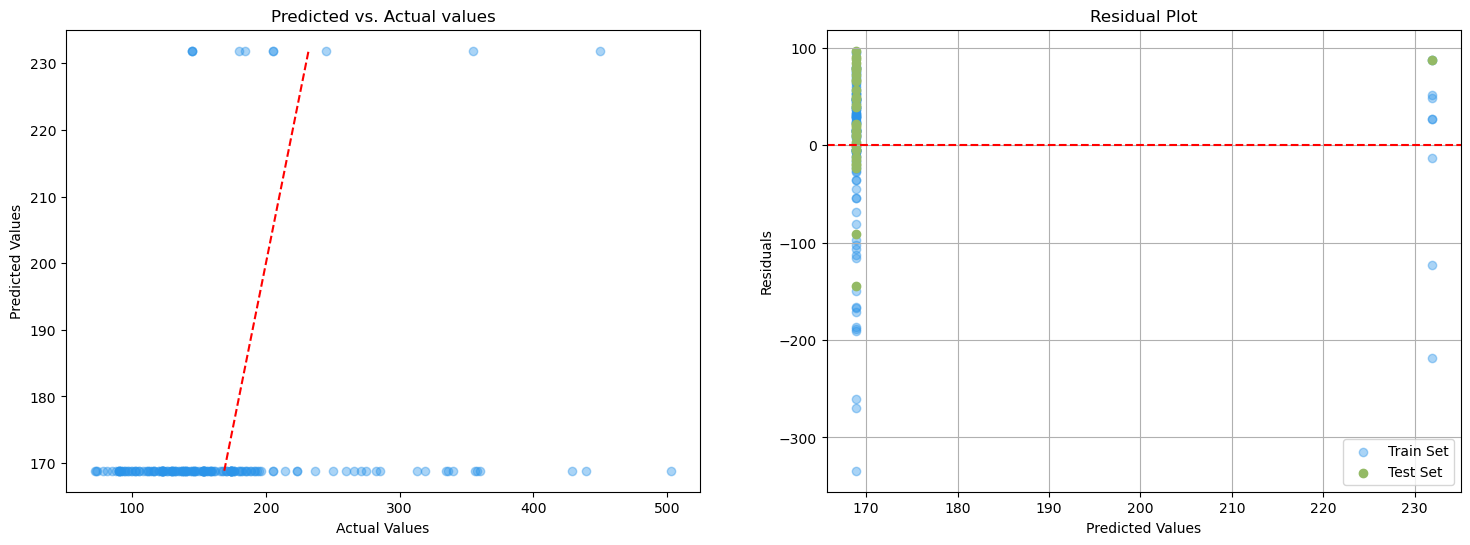

In [283]:
analyze_plot(rf_model, X, y, X_train, X_test, y_train, y_test)

Gradien Boosting model

In [284]:
# Select one feature and target variable
X = df_slu[['review rating']]
y = df_slu['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on testing data
gb_predictions = gb_model.predict(X_test)

In [286]:
# Evaluate the model
rmse = mean_squared_error(y_test, gb_predictions, squared=False)
mae = mean_absolute_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
RMSE: 91.58953967825875
MAE: 59.28492510425832
R-squared: -2.218567302348462


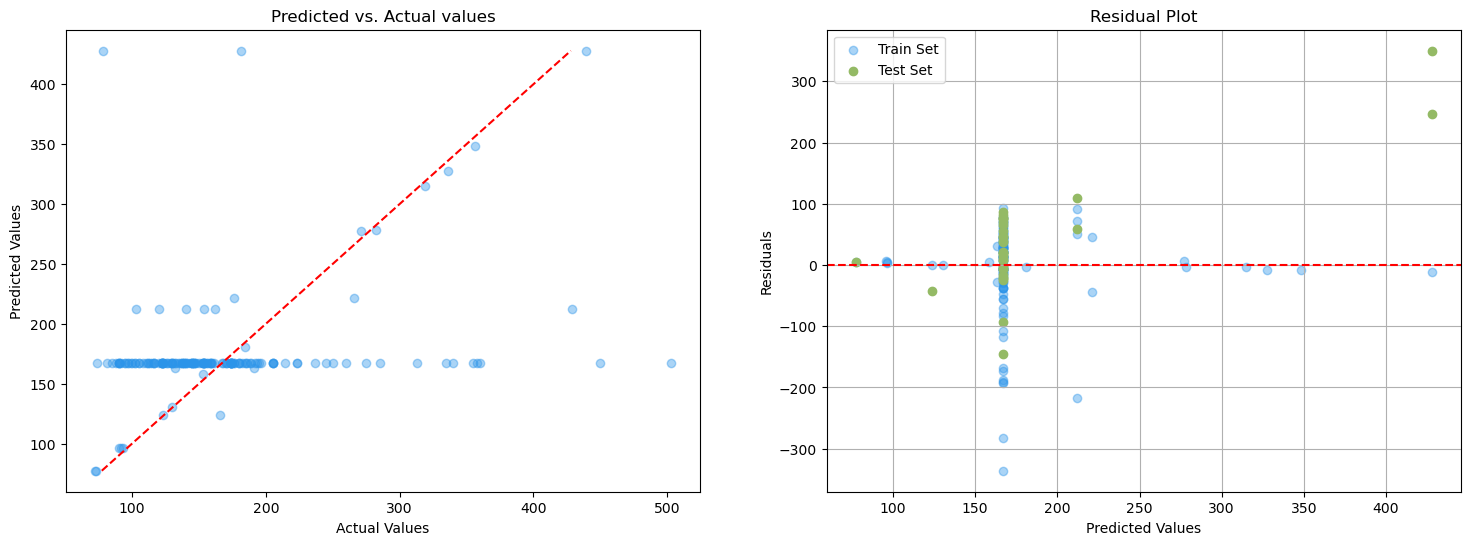

In [287]:
analyze_plot(gb_model, X, y, X_train, X_test, y_train, y_test)